# Evolutionary Algorithms

## Introduction
- Pioneered in the 1960s and 1970s.
- Superordinate concept, which includes Evolutionary Programming, Genetic Programming and Evolution Strategies.
* Used for optimization (constrained and unconstrained)
* Procedure is inspired from biology.
* We have a set of candidate solutions for an optimization problem, which play the role of individuals in a population. A fitness function determines the quality of the solutions.
* In order to improve solution quality, actions like mutation or crossover/breeding can be performed.

![[OBG] Ablauf.PNG](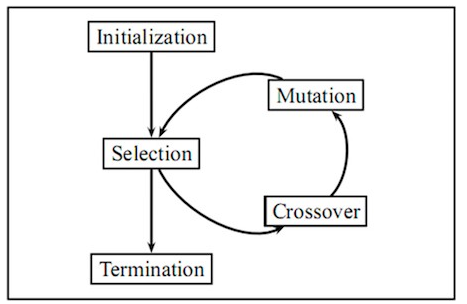)

* In **Genetic Programming**, the crossover and mutation operator are used.
* In **Evolutionary Programming**, mainly the mutation operator is used.

![[OBG] Overview.png](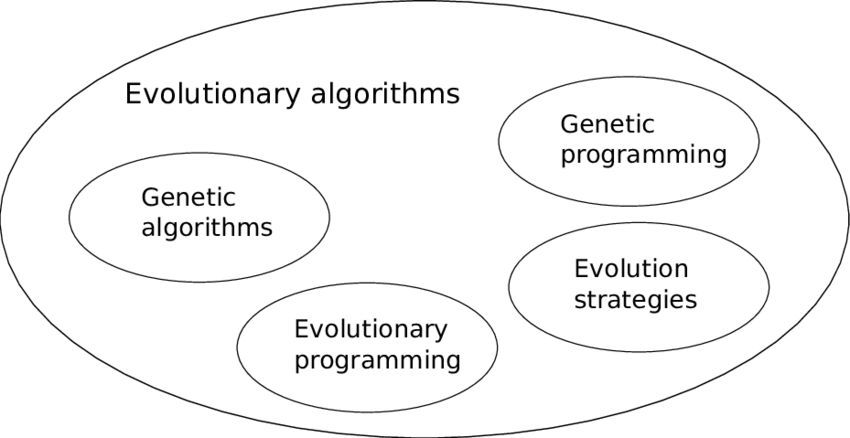)

 ## MAXONE: Maximizing a binary sequence with an genetic algorithm

## Pseudocode
```
START
Initialization
Calculate Fitness of Population
DO While not Converged:
    Selection
    Crossover
    Mutation
    Calculate Fitness
TERMINATE
``` 
 ### Initialization
We create an initial `population` as a matrix of shape: $n_{chromosomes} \times n_{genes}$,  
whereas each chromosome contains a sequence of genes as ones and zeros which are initialized randomly.  
  
$$
Population = \begin{bmatrix}
1 & 0 & 0 & 0 & 1 & 0 \\
1 & 1 & 0 & 0 & 1 & 1 \\
0 & 0 & 0 & 1 & 1 & 1 \\
\cdots
\end{bmatrix}
$$


### Fitness
The fitness function is our objective on how we measure the actual quality of a single chromosome. In this case we define the fitness of the chromosomes based on the sum over the n-genes of the vector:
$$
fitness = \sum_{i=0}^{n-1} chromosome_i
$$

while our fittest chromosome is equal to it's length: $max_{fitness} = chromesome_{length}$.  

### Selection
In our case we use the best and second best performing chromosome for `selection`, while also picking the worst performing chromosome which we later replace with an offspring.

### Crossover
During the crossover we define a random index: $index \in [0, chromosome_{length - 1}]$.  
This index will define the range of the two chromosomes in which we will swap genes for the crossover, such that:  
  
$$
\forall i \in [0, \dots, chromosome_{length-1}]\\
a_i, b_i = b_i, a_i
$$
Displaying the `crossover` process in a matrix:    

$$
\text{Parents}=
\begin{bmatrix}
1 & 1 & 0 & | & 0 & 1 & 1\\
0 & 0 & 0 & | & 1 & 1 & 1
\end{bmatrix}
\overrightarrow{\text{Offsprings}}
\begin{bmatrix}
0 & 0 & 0 & | & 0 & 1 & 1\\
1 & 1 & 0 & | & 1 & 1 & 1
\end{bmatrix}
$$

After `offsprings` has been created they are added to the `population` while we replace the two worst performing chromosomes from the pool.

### Mutation
The `mutation` process is essential to genetic algorithms, just as it is to Biology. In our example we applied it a random chance to our new created `offsprings`. This implies that we flip the zeros and ones given a range defined by also random definition.  
  
$$
\text{Offsprings}=
\begin{bmatrix}
0 & 0 & | & 0 & 0 & 1 & | & 1\\
1 & 1 & | & 0 & 1 & 1 & | & 1
\end{bmatrix}
\overrightarrow{\text{mutation}}
\begin{bmatrix}
0 & 0 & | & 1 & 1 & 0 & | & 1\\
1 & 1 & | & 1 & 0 & 0 & | & 1
\end{bmatrix}
$$

We terminate the algorithm after a set amount of generations, or if the solution has been found.






In [ ]:
import random
from typing import List
import matplotlib.pyplot as plt
import numpy as np

In [ ]:
class Individual():
    def __init__(self, genome_length: int = 7):
        self.fitness = 0
        self.genome_length = genome_length
        self.genes = self._random_init()

    def __gt__(self, other):
        return self.fitness > other

    def __lt__(self, other):
        return self.fitness < other

    @property
    def get_genes(self):
        return self.genes

    def _random_init(self):
        return [random.randint(0,1) for _ in range(self.genome_length)]

    def calculate_fitness(self):
        self.fitness = 0
        for g in self.genes:
            if g == 1:
                self.fitness += 1


class Population():
    def __init__(self, genome_length: int, n_individuals: int):
        self.individuals = [Individual(genome_length) for _ in range(n_individuals)]
        self.fittest = 0

    def _init_population(self, n_individuals: int = 10):
        self.individuals = [Individual() for _ in range(n_individuals)]

    @property
    def get_genome_length(self):
        return self.individuals[0].genome_length

    def calculate_fitness(self):
        for i, _ in enumerate(self.individuals):
            self.individuals[i].calculate_fitness()
        
    def fitness(self) -> [Individual, Individual, int, int]:
        self.calculate_fitness()
        fittest = {i: genome.fitness for i, genome in enumerate(self.individuals)}
        fittest = dict(sorted(fittest.items(), key=lambda i: i[1], reverse=True))
        rank = list(fittest.keys())
        self.fittest = self.individuals[rank[0]].fitness

        return (self.individuals[rank[0]],
                self.individuals[rank[1]], 
                rank[-1],
                rank[-2])

class GeneticAlgorithm():
    def __init__(self, genome_length: int, n_individuals: int):
        self.population = Population(genome_length, n_individuals=n_individuals)
        self.generations = 0

    @property
    def get_fittest(self):
        return self.fittest.fitness

    def selection(self) -> [Individual, Individual, Individual, Individual]:
        self.fittest, self.second_fittest, self.weakest, self.second_weakest = self.population.fitness()

    def crossover(self) -> [Individual, Individual]:
        crossover_id = random.randint(self.population.get_genome_length//2, self.population.get_genome_length - 1)

        for i in range(crossover_id):
            self.fittest.genes[i], self.second_fittest.genes[i] = \
            self.second_fittest.genes[i], self.fittest.genes[i]
        return self.fittest, self.second_fittest
    
    def mutation(self, offsprings: List[Individual]):
        def mutation_helper():
            mutation_start = random.randint(0, (self.population.get_genome_length - 1)//2)
            mutation_end = random.randint(mutation_start+1, self.population.get_genome_length - 1)
            return mutation_start, mutation_end
        for offspring in offsprings:
            start, end = mutation_helper()
            for i, g in enumerate(offspring.genes[start:end+1]):
                offspring.genes[i] = 1 if offspring.genes[i] == 0 else 0
        return offsprings

    def offspring(self):
        first_offspring, second_offspring = self.crossover()
        if random.randint(0, 11) % 2 == 0:
            first_offspring, second_offspring = self.mutation(offsprings=[first_offspring, second_offspring])
        self.population.individuals[self.weakest] = first_offspring
        self.population.individuals[self.second_weakest] = second_offspring

    def step(self):
        self.generations += 1
        self.selection()
        self.offspring()
        self.population.calculate_fitness()


[[0, 0, 0, 1, 0, 0, 1, 1, 0, 0], [0, 1, 1, 1, 1, 1, 1, 1, 1, 0], [0, 0, 0, 0, 0, 0, 0, 0, 0, 1], [1, 1, 0, 0, 0, 1, 1, 1, 0, 0], [1, 1, 0, 1, 0, 0, 1, 0, 1, 1], [0, 1, 1, 1, 0, 0, 1, 0, 1, 0], [1, 0, 1, 1, 1, 0, 0, 0, 1, 1], [0, 0, 0, 1, 1, 0, 0, 0, 0, 0], [0, 1, 1, 0, 0, 0, 1, 1, 1, 1], [0, 1, 1, 0, 1, 0, 0, 0, 1, 0], [0, 1, 0, 1, 1, 0, 0, 1, 0, 1], [1, 1, 0, 1, 0, 1, 0, 0, 0, 1], [0, 1, 0, 0, 1, 0, 1, 0, 1, 0], [1, 1, 1, 0, 0, 0, 0, 0, 1, 1], [0, 0, 0, 1, 0, 1, 0, 0, 1, 0], [0, 0, 0, 0, 1, 1, 1, 1, 0, 0], [1, 1, 1, 0, 1, 1, 0, 0, 0, 1], [0, 1, 1, 0, 1, 1, 1, 1, 1, 1], [0, 0, 1, 1, 0, 1, 0, 1, 0, 0], [0, 1, 1, 0, 0, 1, 1, 0, 0, 0]]
Generation: 20	Fittest: 7	Genes: [1, 1, 1, 0, 1, 0, 1, 1, 0, 1]
Generation: 40	Fittest: 8	Genes: [1, 1, 1, 1, 1, 1, 0, 0, 1, 1]
Generation: 60	Fittest: 7	Genes: [1, 1, 0, 1, 0, 0, 1, 1, 1, 1]
Generation: 80	Fittest: 7	Genes: [1, 1, 1, 0, 1, 1, 1, 0, 0, 1]
Generation: 100	Fittest: 4	Genes: [1, 1, 1, 0, 0, 0, 1, 0, 0, 0]
Generation: 120	Fittest: 6	Genes: [1, 

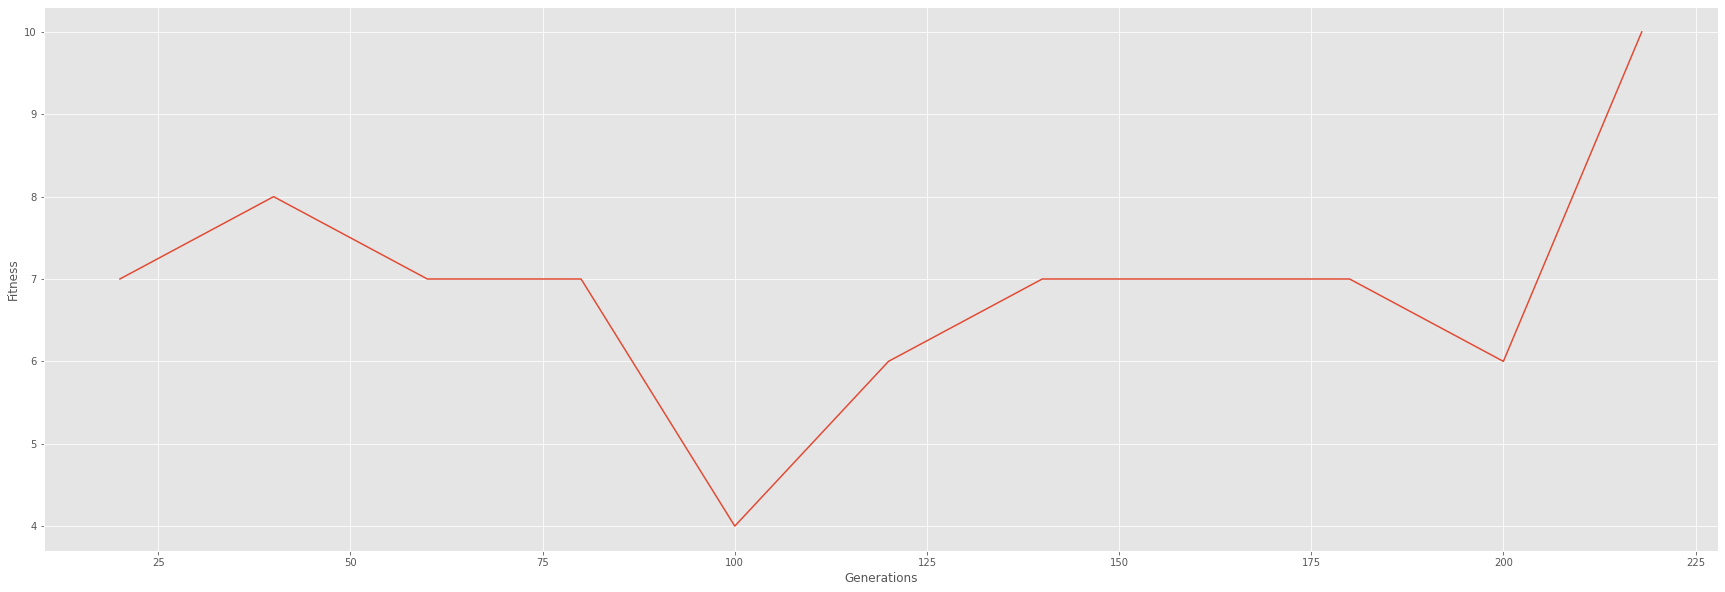

In [ ]:
def generate(genome_length, n_individuals, terminate_after: int = 1000000):
    ga = GeneticAlgorithm(genome_length, n_individuals)
    print([g.genes for g in ga.population.individuals])
    ga.step()
    gen_trace = []
    steps = []
    fitness_scores = []
    while ga.get_fittest < ga.population.get_genome_length:
        ga.step()
        if ga.generations % 20 == 0:
            print(f'Generation: {ga.generations}\tFittest: {ga.get_fittest}\tGenes: {ga.fittest.genes}')
            fitness_scores.append(ga.get_fittest)
            steps.append(ga.generations)
            gen_trace.append(
                {
                    'Generation': ga.generations,
                    'Fittest': ga.get_fittest,
                    'Population': [c.genes for c in ga.population.individuals]
                }
            )
        if ga.generations > terminate_after:
            break
    fitness_scores.append(ga.get_fittest)
    steps.append(ga.generations)
    plt.style.use('ggplot')
    plt.figure(figsize=(30,10))
    plt.xlabel('Generations')
    plt.ylabel('Fitness')
    plt.plot(steps, fitness_scores)
    
    print(f'\nSolution found in generation {ga.generations}')
    print(f'Fitness: {ga.fittest.fitness}')
    print(f'Genes: {ga.fittest.genes}')
    return gen_trace

gen_trace = generate(10, 20)

## Markov Chains

* Given a discrete time system that can be described by a set of discrete states $S = \{S_1, ... , S_n\}$, for example the weather can be described as a set S = {rainy, nice, snowy}.
* $p_{ij}$ denotes the transition probability from state i to j. For all i we have $\sum^n_{j=1} p_{ij} = 1$ 
* P forms the $n \times n$ transition matrix (also called probability or stochastic matrix) of the Markov process. 

### Example
* We are in the Land of Oz, which unfortunately never has 2 nice days in a row.
* On a nice day(N), we have a 50% chance of rain (R) and a 50% chance of snow (S).
* If it rains, we have a probability of 50% of rain on the next day, 25% chance of snow and 25% of nice weather.
* If it snows, we have a probability of 50% of snow on the next day, 25% chance of rain and 25% of nice weather.

$$


\begin{array}{ccc}
R & N & S \\
P  = & {\left[\begin{array}{ccc}
1 / 2 & 1 / 4 & 1 / 4 \\
1 / 2 & 0 & 1 / 2 \\
1 / 4 & 1 / 4 & 1 / 2
\end{array}\right]} & \begin{array}{c}
R \\
N \\
S
\end{array}
\end{array}
$$

$$
P^2 = \begin{bmatrix}
0.4375 & 0.1875 & 0.3750\\
0.3750 & 0.2500 & 0.3750 \\
0.3750 & 0.1875 & 0.4375  
\end{bmatrix}
$$




## Markov Model Notation for Evolutionary Algorithms

* EA with population size **N** in a discrete search space of size **n**, search space consists of q-bit binary strings, so $n = 2^q$
* $x_i$ denotes the i-th bit string in the search space, $v$ ist the population vector, where $v_i$ denotes the number of $x_i$ individuals in the population.
* The total number of individuals is equal to $N$
$$
\sum^n_{i=1} v_i = N 
$$

* $y_k$ denotes the k-th individual in the population. The population Y of the EA is represented as

$$
\begin{aligned}
Y &=\left\{y_{1}, \cdots, y_{N}\right\} \\
&=\{\underbrace{x_{1}, x_{1}, \cdots, x_{1}}_{v_{1} \text { copies }}, \underbrace{x_{2}, x_{2}, \cdots, x_{2}}_{v_{2} \text { copies }}, \cdots \underbrace{x_{n}, x_{n}, \cdots, x_{n}}_{v_{n} \text { copies }}\}
\end{aligned}
$$

* T denotes all possible populations Y.

### Example

* We have an EA population size N = 2 and a two bit search space with n = 4 and bit strings building the search space $\{00,01,10,11\}$. Possible populations T are:
$$
$$
\begin{array}{ll}
\{00,00\}, & \{00,01\} \\
\{00,10\}, & \{00,11\} \\
\{01,01\}, & \{01,10\} \\
\{01,11\}, & \{10,10\} \\
\{10,11\}, & \{11,11\}
\end{array}
$$
$$

* T (the count of possible populations) can be computed as follows:
$
T = \begin{pmatrix}
n + N - 1\\
N
\end{pmatrix}
$
* In our example this is the binomialcoefficient of $\begin{pmatrix}
5\\
2
\end{pmatrix}$ which is 10.


## Markov Models of Genetic Algorithms

### Selection 

* We consider fitness-proportional (roulette-wheel selection). The probability of selecting an $x_i$ individual with one spin is proportional to the fitness of $x_i$, multiplied by the number of $x_i$ individuals in the population. The probability of selecting an $x_i$ individual depending on the population vector $v$ with one spin is:

$$
\tag{1}
P_s(x_i|v) = \frac{v_if_i}{\sum^n_{j=1}v_jf_j}
$$


* $f_i$ denotes the fitness of $x_i$




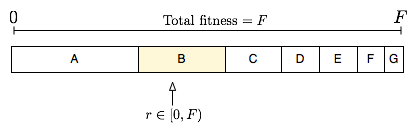

* Consider now a population with N individuals, spin now the roulette wheel N times to select N parents.
* Each spin has n possible outcomes $\{x_1, ..., x_n\}$.
* $ U = [U_1, ..., U_n] $ is a vector of random variables where $U_i$ denotes the total number of times that $x_i$ occurs in N spins. Let $u = [u_1, ..., u_n]$ be a realization of $U$.
* Through multinomial distribution theory we receive the probability of obtaining the population vector *u* after N spins starting with the population vector $v$:
$$
Pr_s(u|v) = N! \prod^n_{i=1}\frac{[P_s(x_i|v)]^{u_i}}{u_i!}
$$

### Mutation
* After selection, the selected individuals are now ready for mutation.
* M is a matrix containing probabilities, where j denotes the row, i the column and $M_{ij}$ denotes the probability that $x_j$ mutates to $x_i$.
* The probability of receiving an $x_i$ individual ($i \in [1,n]$) after a single spin of the roulette wheel followed by a single chance of mutation is:

$$
P_{sm}(x_i|v) = \sum^n_{j=1} M_{ij}P_s(x_j|v)
$$

* We can write the n-element vector whose i-th element is equal to $P_{sm}(x_i|v)$ as follows:

$$
P_{sm}(x|v) = M^{\top}P_s(x|v) 
$$

* Multinomial distribution theory gives us now the probability vector $u$ if we start with the population vector $v$, **after** selection and mutation took place.

$$
Pr_{sm}(u|v) = N! \prod^n_{i=1} \frac{[P_{sm}(x_i|v)]^u_{i}}{u_i!}
$$

#### Example for Mutation

* Four element search space with individuals $\{x_1, x_2, x_3, x_4\} = \{00, 01, 10, 11\}$.
* Each bit in each individual has a 10% chance of mutation.
* The probability, that 00 remains 00 is equal to the probability, that the first 0 bit remains unchanged (90%), multiplied by the probability, that the second 0 bit remains unchanged (90%). This gives us a probability of 0.81.
* The probability that 00 changes to 01 is calculated as follows: The probability that 0 does not change is 90%. The probability that 0 changes to 1 is 10%. So 90% * 10% gives us 0.09 (9%). If we continue this procedure, we find a probability matrix:
$$
M=\left[\begin{array}{llll}
0.81 & 0.09 & 0.09 & 0.01 \\
0.09 & 0.81 & 0.01 & 0.09 \\
0.09 & 0.01 & 0.81 & 0.09 \\
0.01 & 0.09 & 0.09 & 0.81
\end{array}\right]
$$

* M is symmetric, which means that M is equal to its transpose $M^T$. This says us, that it is equally likely for $x_i$ to mutate to form $x_j$ as it is for $x_j$ to form $x_i$.


## Crossover

* Let $r_{jki}$ denote the probability that $x_j$ and $x_k$ cross and form $x_i$
* The probability of obtaining $x_i$ andividual after 2 spins of the roulette wheel, followed by a single chance of mutation for each selected individual, followed by crossover: 

$$ 
P_{smc}(x_i|v) = \sum^n_{j=1} \sum^n_{k=1} r_{jki}P_{sm}(x_j|v)P_{sm}(x_k|v) 
$$

* Multinomial distribution gives us the probability of obtaining the population vector $u$ if we start with the population vector $v$, after selection, mutation and crossover took place:
$$
Pr_{smc}(u|v) = N! \prod^n_{i=1}\frac{[P_{smc}(x_i|v)]^{u_i}}{u_i!}
$$

### Example for Crossover

* Four element search space with individuals $\{x_1, x_2, x_3, x_4\} = \{00, 01, 10, 11\}$ 
* Crossover sets randomly b (bit) = 1 or b = 2 with equal probability. Then we concatenate bits $1 \rightarrow{} b$ from the first parent with bits $(b + 1) \rightarrow{} 2$ from the second parent.
* Some crossover possibilities are:

$$
00 \times 00 \rightarrow{} 00 \\
00 \times 01 \rightarrow{} 01 | 00 \\
00 \times 10 \rightarrow{} 00 \\
00 \times 11 \rightarrow{} 01 | 00 
$$

* This gives us the crossover probabilities ($\{x_1, x_2, x_3, x_4\} = \{00, 01, 10, 11\})$: 
$$
\\
\begin{array}{llll}
r_{111}=1.0, & r_{112}=0.0, & r_{113}=0.0, & r_{114}=0.0 \\
r_{121}=0.5, & r_{122}=0.5, & r_{123}=0.0, & r_{124}=0.0 \\
r_{131}=1.0, & r_{132}=0.0, & r_{133}=0.0, & r_{134}=0.0 \\
r_{141}=0.5, & r_{142}=0.5, & r_{143}=0.0, & r_{144}=0.0 .
\end{array}
$$

## Evolution Strategies

* Evolution Strategies (ES) are a type of black box optimization algorithms.
* In black box optimization we can evaluate a target function $f(x): \mathbb{R}^n \rightarrow{} \mathbb{R}$
* In ES the vectors are real numbers, so $x \in \mathbb{R}^n$


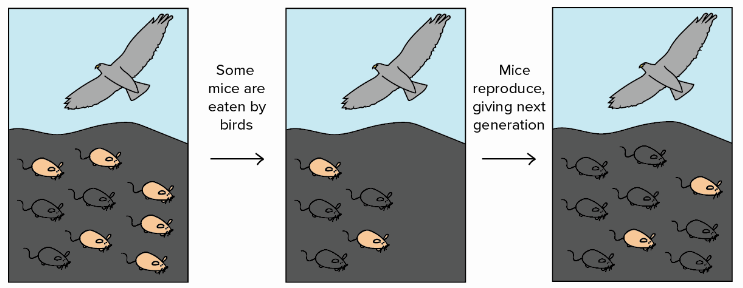

### General procedure

* We want to optimize $f(x)$ but we can not compute gradients directly.
* However we can evaluate $f(x)$  given any $x$.
* Our assumption in a probability distribution over $x$ as a good solution to $f(x)$ optimization is $p_\theta(x)$. We want to find an optimal configuration of $\theta$.
* We start with an initial $\theta$ and then we update $\theta$ continuously.

1. Generate a population of samples $D = \{(x_i, f(x_i)\}$ where $x_i \sim p_\theta(x)$.
2. Evaluate the fitness of samples in $D$.
3. Select the best individuals and use them to update $\theta$, based on fitness or rank.




***

## Gaussian Evolution Strategies

* This ES-version models $p_\theta(x)$ as n-dimensional isotropic Gaussian distribution, where $\theta$ tracks the mean $\mu$ and standard deviation $\sigma$.
* Isotropic (*isos* 'equal', *tropos* 'way') is uniformity in all directions.
* In a isotropic Gaussian distribution the covariance matrix $\Sigma$ is represented as $\Sigma = \sigma^2I$
* The traditional gaussian distribution is $\mathcal{N}(\mu, \Sigma)$. $\mu$ is the mean and $\Sigma$ is the corivariance matrix.
* More dimensions $\rightarrow{}$ More free parameters in Gaussian
* $\mu$ will then have a linear growth and $\Sigma$ will have a quadratic growth. Therefore $\Sigma$ is restricted to $\Sigma = \sigma^2I$ (scalar variance multiplied by an identity matrix).
* $\theta$ only tracks the mean $\mu$ and the standard deviation $\sigma$.
 $$
\theta = (\mu, \sigma) \\
p_\theta(x) = \mathcal{N}(\mu, \sigma^2I) = \mu + \sigma \mathcal{N}(0, I)
 $$


* The process then is:
  1. Initialize $\theta = \theta^{(0)}$ and the generation counter $t = 0$.
  2. Generate the offspring population of size $\Lambda$ by sampling from the Gaussian distribution.
$$
D^{(t+1)} = \{x_i^{t+1} | x_i^{(t+1)} = y_i^{(t+1)} \textrm{ where } y_i^{(t+1)}  \sim \mathcal{N}(x|0, I), i=1, ..., \Lambda\}
$$
  3. Select a top subset of $\lambda$ samples with optimal $f(x_i)$. This is the elite set. We can consider the first $k$ samples in $D^{(t+1)}$ belonging to the elite group.

  $$
  D^{t+1}_{elite} = \{x^{(t+1)}_i | x_i^{(t+1)} \in D^{t+1}, i = 1, ..., \lambda, \lambda \leq \Lambda \}
  $$

  4. Then we need a new mean and a new standard deviation for the next generation. We use the elite set for this task.

  $$
\begin{aligned}
\mu^{(t+1)} &=\operatorname{avg}\left(D_{\text {elite }}^{(t+1)}\right)=\frac{1}{\lambda} \sum_{i=1}^{\lambda} x_{i}^{(t+1)} \\
\sigma^{(t+1)^{2}} &=\operatorname{var}\left(D_{\text {elite }}^{(t+1)}\right)=\frac{1}{\lambda} \sum_{i=1}^{\lambda}\left(x_{i}^{(t+1)}-\mu^{(t)}\right)^{2}
\end{aligned}
  $$

  5. Repeat 2-4 until convergence or criteria is reached.

 

***

## Covariance Matrix Adaption Evolution Strategies (CMA-ES)

* Variance: Measures how far a variable changes away from its mean: $var(X) = \frac{1}{n}\sum^n_{i=1}(X_i - \bar{X})$, $\bar{X}$ is the mean of the samples of X:
* Covariance: Measures how two variables change together $covar(X,Y) = \frac{1}{n}\sum^n_{i=1}(X_i - \bar{X})(Y_i - \bar{Y})$
* Covariance Matrix: Element (i,j) is the covariance between i-th and j-th variables.
$$
\left(\begin{array}{cc}
\operatorname{cov}(A, A) & \operatorname{cov}(A, B) \\
\operatorname{cov}(B, A) & \operatorname{cov}(B, B)
\end{array}\right)=\left(\begin{array}{cc}
\operatorname{var}(A) & \operatorname{cov}(A, B) \\
\operatorname{cov}(B, A) & \operatorname{var}(B)
\end{array}\right)\\
$$
  * always diagonalizable and positive semi-definite.
  * All eigenvalues are real non-negative numbers.
  * All eigenvectors are orthogonal.
  * Orthonormal basis of $\mathbb{R}^n$ consisting of its eigenvectors.






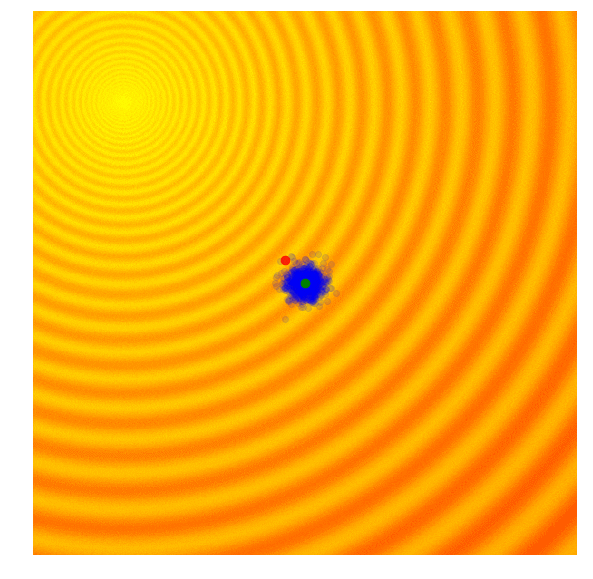

CMA-ES allows us to explore and to increase the standard deviation of our search space or we are able to fine tune the solution since we are close to an optima.

***

![[OBG] CMA.PNG](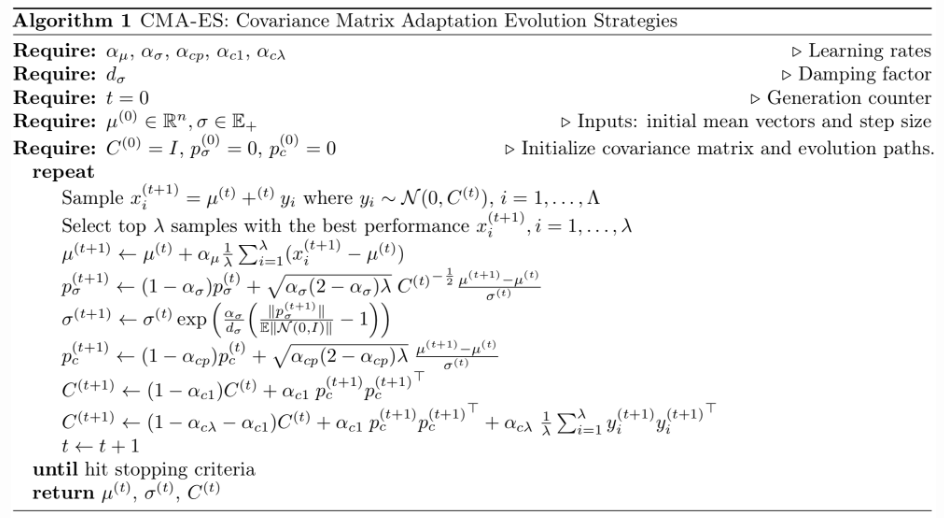)

***

### Mathematical explanation of CMA-ES
* We track now pairwise dependencies between the samples in the distribution through a covariance matrix $C$
$$
\theta = (\mu, \sigma, C), p_\theta(x) \sim \mathcal{N}(\mu, \sigma^2, C) = \sim \mu + \sigma \mathcal{N}(0, C)\\
$$
* $\sim$: denotes the same distribution on the left and right side
* $\mu$: Mean of the generation
* $\sigma$: Step size, through this parameter we are able to control the overall scale of the distribution. Larger steps lead to faster parameter update. 
* $\lambda:$ Count of top samples
* $x^{(t)}_i:$ individual from generation $t$

####Updating the mean
$$
\mu^{(t+1)} = \mu^{(t)} + \alpha_\mu\frac{1}{\lambda}\sum^\lambda_{i=1}(x_i^{(t+1)} - \mu^{(t)})
\\
$$

Learning rate $\alpha_\mu$ controls how fast the mean $\mu$ should be updated. 

### Evolutions paths

* CMA requires evolution paths $p_\sigma$ and $p_c$ for the step size $\sigma$ and the covariance matrix C.
* $\sigma$ needs to know if its steps are too large or too small. $\sigma$ is able to control the overall scale of the distribution. A large $\sigma$ means fast parameter updates.
* When updating C with $y_iy_i^T = (-y_i)(-y_i)^T$ in the rank-one update, we lose the sign information. In order to reintroduce the sign information, we need a evolution path.

#### Utilizing the Evolution Path: Cumulation
* An evolution path can be expressed by a sum of consecutive steps (also called *cumulation*). For the construction, the step size $\sigma$ is not regarded.
$$
\frac{m^{(g+1)} - m^{(g)}}{\sigma^{(g)}} + \frac{m^{(g)} - m^{(g-1)}}{\sigma^{(g-1)}} + \frac{m^{(g-1)} - m^{(g-2)}}{\sigma^{(g-2)}}
$$

* In practice, for the construction of $p_c$, the evolution path of $C$, one uses exponential smoothing. Through this, we assign decreasing weights over time, so more recent steps receive more weight.

$$
p^{(g+1)}_c = (1-c_c)p^{(g)}_c + \sqrt{c_c(2-c_c)\mu_{eff}} \frac{m^{(g+1)} - m^{(g)}}{\sigma^{(g)}}
$$

* $p_c$: Evaluation path for $C$ (covariance matrix), $p_c^{(g+1)} \sim \mathcal{N}(0, C)$
* $c_c < 1$: decay rate for the cumulation
* $\sqrt{c_c(2-c_c)\mu_{eff}}$: Normalization constant for $p_c$

#### Controlling the step size
* $p_\sigma$: To verify if the current step size is good, a *evolution path* $p_\sigma$ is the constructed through summing up a consecutive sequence of moving steps $\frac{1}{\lambda} \sum^\lambda_i y_i^{(j)}, j=1,...,t$
This path length is compared to its expected length under random selection (so the single steps are uncorrelated). The length of the evolution path is the sum of steps.




![[OBG] EvoPath.PNG](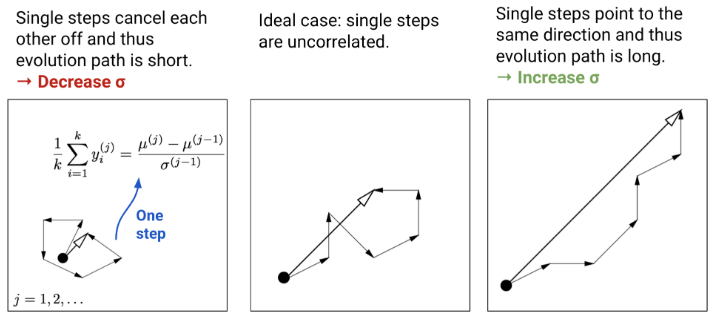)

* $p_\sigma$ is conjugate. A conjugate in context of probabilities means, that a posterior is the same distribution as the prior. Suppose an $X$ which comes from a known distribution $f_\alpha$ where $\alpha$ are possibly unknown parameters of $f$. $f$ can be a Normal distribution or Binomial Distribution etc. Now, for particular distributions $f_\alpha$ there may exist a prior distribution $p_\beta$ such that:


$$
\overbrace{p_{\beta}}^{\text {prior }} \cdot \overbrace{f_{\alpha}(X)}^{\text {data }}=\overbrace{p_{\beta^{\prime}}}^{\text {posterior }} \\
$$

* $\beta'$ is a different set of parameters, but $p$ is the same distribution as the prior.

* We need $p_\sigma$ to be conjugate since we need to know if its necessary to scale. Therefore we have to exploit the length of the evolution path. However, the expected length of the conjugate evolution path $p_\sigma$ does not depend on the direction like $p_c$. The expected length of $p_\sigma$ depends on the random selection.


$$
p^{(g+1)}_\sigma = (1-c_\sigma)p_\sigma^{(g)} + \sqrt{c_\sigma(2-c_\sigma)\mu_{eff}} C^{(g)^{-\frac{1}{2}}} \frac{m^{(g+1)} - m^{(g)}}{\sigma^{(g)}}
$$

* $p_\sigma \sim \mathcal{N}(0, I)$
* $C^{(g)^{-\frac{1}{2}}} = B^{(g)} D^{(g)^{-1}} B^{(g)^{T}}$ is a eigendecomposition of $C^{(g)}$. Makes the expected length of $p^{(g+1})_\sigma$ independent of its direction.
  * $B^{(g)}$: contains two vectors of $C's$ eigenvectors. The original space is projected onto perpendicular principal axes.
  * $D^{(g)^{-1}}$: Rescaling so that all axes have an equal size.
  * $B^{(g)^{T}}$: Transforms the space back into the original coordinate system.

* The final update of $\sigma$ is then computed through a comparision $||p_\sigma^{(g+1)}||$ with its expected length $E||\mathcal{N}(0, I)||$

$$
ln \sigma^{(g+1)} = ln \sigma^{(g)} + \frac{c_\sigma}{d_\sigma}\Bigg(\frac{||p_\sigma^{(g+1)}||}{||\mathcal{N}(0, I)||} - 1\Bigg)
$$

#### Updates for C

* We want to have fast iteration with a small population of samples in CMA-ES. This wish causes a more complex approach to update C.

1. Rank-min($\Lambda, n)$ update: Use the history of $\{C_\lambda\}$ each estimated from scratch. This allows us to use a small population. \\

The first update considers the estimation of $C$ from the entire history of $\{C_\lambda\}$. If we had a large number of generations (t), $C^{(t+1)} \sim avg(C_\lambda^{(i)}; i = 1, ..., t)$ would be a good estimator. \\

$$
C^{(t+a)} = (1 - \alpha_{c\lambda})C^{(t)} + \alpha_{c\lambda}C^{(t+1)}_\lambda \\ = (1-\alpha_{c\lambda})C^{(t)} + \alpha_{c\lambda}\frac{1}{\lambda} \sum^\lambda_{i=1}y_i^{(t+1)}y_i^{(t+1)^T}
$$



2. Rank-one update: Estimates the moving steps $y_i$ and the sign information from the history. Through the rank-one update we are able to update the matrix without refactoring it. We add another matrix of rank one.

* Remember the issue that $y_iy_i^T = (-y_i)(-y_i)^T$ loses the sign information. The evolution path $p_c$ is used to track the sign information.

$$
p^{(g+1)}_c = (1-\alpha_{c1})p^{(g)}_c + \sqrt{c_c(2-c_c)\mu_{eff}} \frac{m^{(g+1)} - m^{(g)}}{\sigma^{(g)}}
$$

* We use this evolution path for the rank-1-update of the covariance matrix update:
$$
C^{(t+1)} = (1-\alpha_{c1})C^{(t)} + \alpha_{c1}p^{(t+1)}_cp_c^{(t+1)^T}
$$

* Finally, the combination of both approaches:
$$
C^{(t+1)}=\left(1-\alpha_{c \lambda}-\alpha_{c 1}\right) C^{(t)}+\alpha_{c 1} \underbrace{p_{c}^{(t+1)} p_{c}^{(t+1)^{\top}}}_{\text {rank-one update }}+\alpha_{c \lambda} \underbrace{\frac{1}{\lambda} \sum_{i=1}^{\lambda} y_{i}^{(t+1)} y_{i}^{(t+1)^{\top}}}_{\text {rank-min(lambda, n) update }}
$$


# Covariance – A Visual Take

In [ ]:
import math
from mpl_toolkits.mplot3d import axes3d
from scipy.stats import norm, multivariate_normal

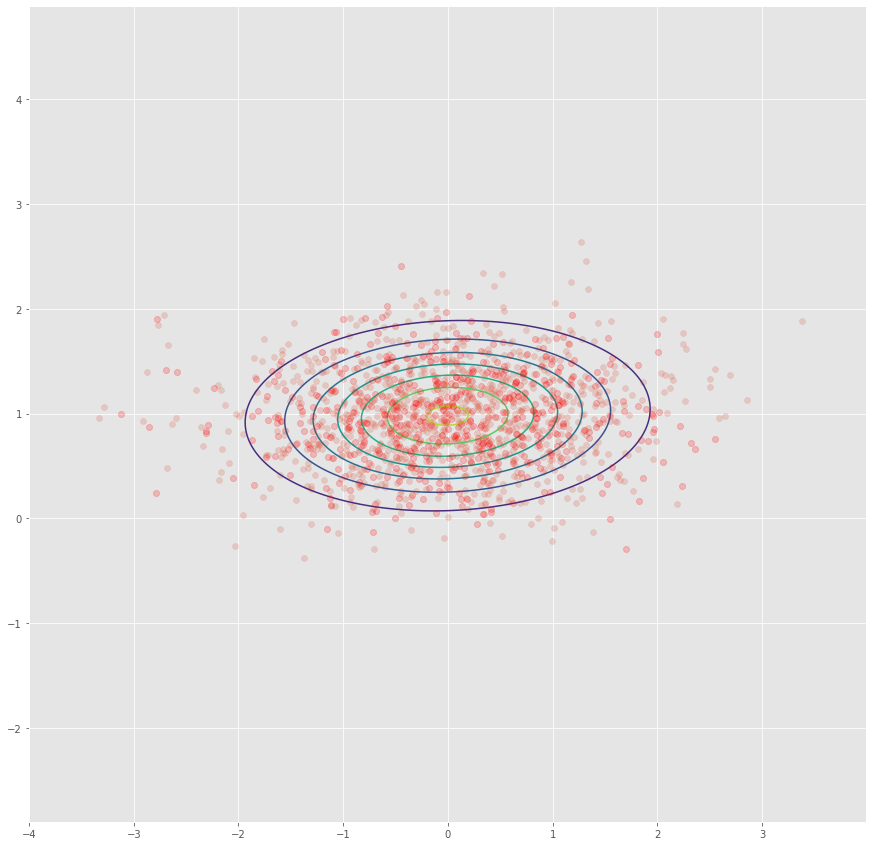

In [ ]:
plt.figure(figsize=(15,15))
plt.axis('equal')

mu = [0, 1]
cov = [[1, 0],
       [0, 0.2]]
sample = np.random.multivariate_normal(mu, cov, 1000).T
plt.scatter(sample[0], sample[1], marker='o', alpha=0.2)

est_mean = sample.mean(axis=1)
est_cov = np.cov(sample)
e_x, e_y = np.random.multivariate_normal(est_mean, est_cov, 500).T


plt.plot(e_x, e_y, 'ro', alpha=0.2)
x, y = np.mgrid[-4:4:.01, -1:3:.01]
pos = np.empty(x.shape + (2, ))
pos[:, :, 0] = x
pos[:, :, 1] = y

rv = multivariate_normal(est_mean, est_cov)
plt.contour(x, y, rv.pdf(pos))
plt.show()

/usr/local/lib/python3.6/dist-packages/numpy/core/_asarray.py:136: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray
  return array(a, dtype, copy=False, order=order, subok=True)


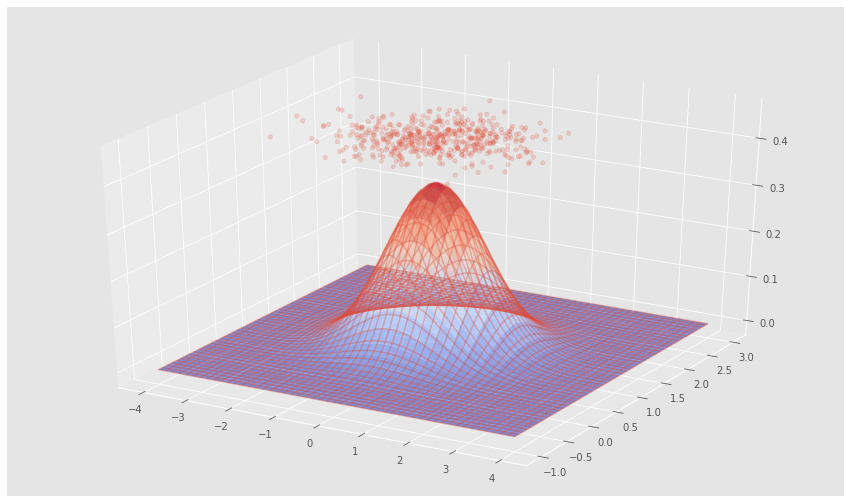

In [ ]:
from matplotlib import cm

fig = plt.figure(figsize=(15, 9))
ax = fig.gca(projection='3d')
ax.plot_surface(x, y, rv.pdf(pos), cmap=cm.coolwarm, rstride=30, alpha=0.6)
ax.plot_wireframe(x, y, rv.pdf(pos), alpha=0.33)
ax.scatter(e_x, e_y, 0.45, marker='o', alpha=0.2)
ax.axis('tight')
plt.show()

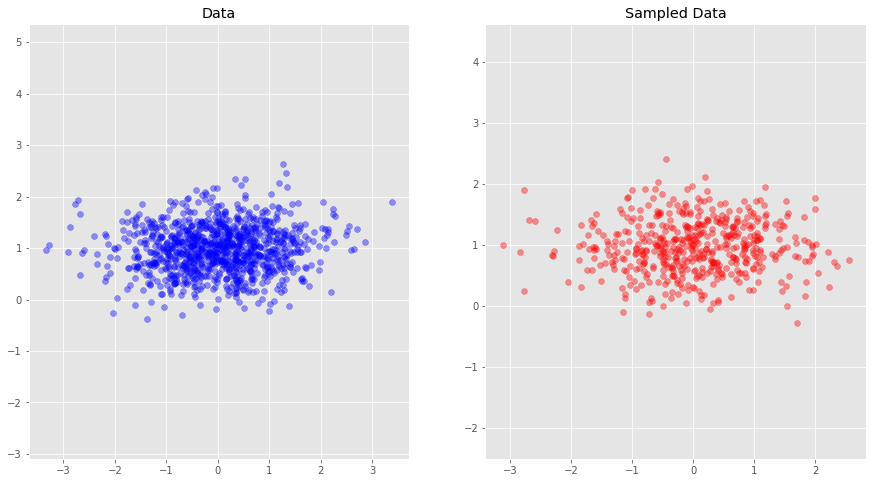

[[0.95013069 0.03136589]
 [0.03136589 0.21003252]]


In [ ]:
fig = plt.figure(figsize=(15, 8))
plt.subplot(121)
plt.scatter(sample[0,:], sample[1,:], color='b', marker='o', alpha=0.4)
plt.title('Data') 
plt.axis('equal')
plt.subplot(122)
plt.scatter(e_x, e_y, marker='o', color='r', alpha=0.4)
plt.title('Sampled Data') 
plt.axis('equal')
plt.show()
print(np.cov(sample))

In [ ]:
def rotate_samples(samples: np.ndarray):
    """
    Found here: https://math.stackexchange.com/questions/383321/rotating-x-y-points-45-degrees
    """
    th = -(np.pi / 4)
    rot_matrix = np.array([[np.cos(th), -np.sin(th)],
                           [np.sin(th), np.cos(th)]])
    return samples.T.dot(rot_matrix).T


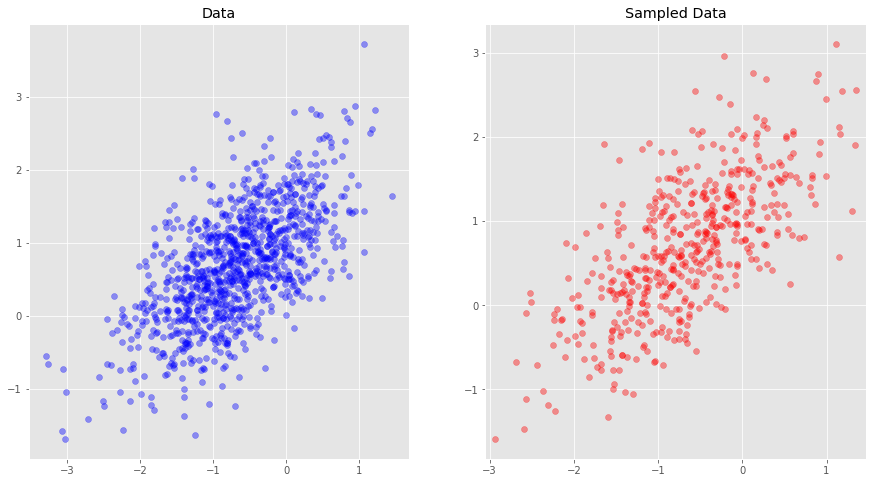

[[0.54871572 0.37004908]
 [0.37004908 0.6114475 ]]


In [ ]:
rot_data = rotate_samples(sample)
rot_est_mean = rot_data.mean(axis=1)
rot_est_cov = np.cov(rot_data)
rot_e_x, rot_e_y = np.random.multivariate_normal(rot_est_mean, rot_est_cov, 500).T
fig = plt.figure(figsize=(15, 8))
plt.subplot(121)
plt.scatter(rot_data[0,:], rot_data[1,:], marker='o', color='b', alpha=0.4)
plt.title('Data') 
plt.axis('equal')
plt.subplot(122)
plt.scatter(rot_e_x, rot_e_y, marker='o', color='r', alpha=0.4)
plt.title('Sampled Data') 
plt.axis('equal')
plt.show()
print(np.cov(rot_data))

/usr/local/lib/python3.6/dist-packages/numpy/core/_asarray.py:136: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray
  return array(a, dtype, copy=False, order=order, subok=True)


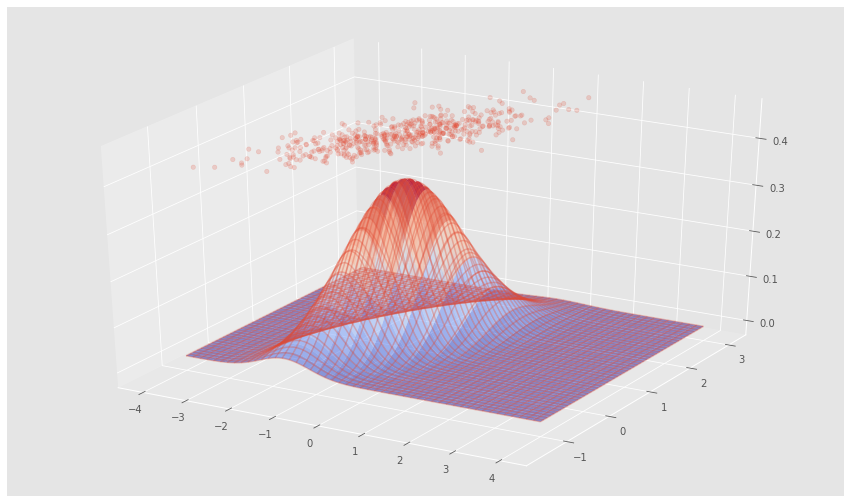

In [ ]:
rv_rot = multivariate_normal(rot_est_mean, rot_est_cov)
fig = plt.figure(figsize=(15, 9))
ax = fig.gca(projection='3d')
ax.plot_surface(x, y, rv_rot.pdf(pos), cmap=cm.coolwarm, rstride=30, alpha=0.6)
ax.plot_wireframe(x, y, rv_rot.pdf(pos), alpha=0.33)
ax.scatter(rot_e_x, rot_e_y, 0.45, marker='o', alpha=0.2)
ax.axis('tight')
plt.show()

## Evolution Strategies
(Examples are made via DEAP, a framework for evolutionary algorithms)

* `base`: contains the toolbox, which contains all evolutionary operators we might need, such as mutation and crossovers variants. Also contains the fitness class and statistic features.
* `creator`: is used to create meta classes that will be used to satisfy the needs of EAs
* `algorithms`: implements most EA we can think of, plus these algorithms take the most necessary arguments
* `benchmarks` implements common mathematical benchmarking tasks to test algorithms

In [ ]:
!pip install deap
from deap import base, creator, benchmarks, tools, algorithms, cma

     |████████████████████████████████| 163kB 5.6MB/s 


In [ ]:
# plotting problem
def plot_problem(dims: str = '3'):
    min_x, min_y, max_x, max_y = -5, -5, 5, 5
    x_range = np.arange(min_x, max_x, (max_x - min_x)/100)
    y_range = np.arange(min_y, max_y, (max_y - min_y)/100)

    x, y = np.meshgrid(x_range, y_range)
    z = np.zeros((len(x_range), len(y_range)))

    for i, _ in enumerate(x_range):
        for j, _ in enumerate(y_range):
            z[i, j] = benchmarks.bohachevsky((x_range[i], y_range[j]))[0]

    fig = plt.figure(figsize=(15, 10))
    if dims == '3':
        ax = fig.gca(projection='3d')
        cset = ax.plot_surface(x, y, z, cmap=cm.coolwarm_r, alpha=0.8)
    else:
        ax = fig.gca()
        ax.set_aspect('equal')
        cset = ax.contourf(x, y, z, cmap=cm.coolwarm_r)
    plt.show()

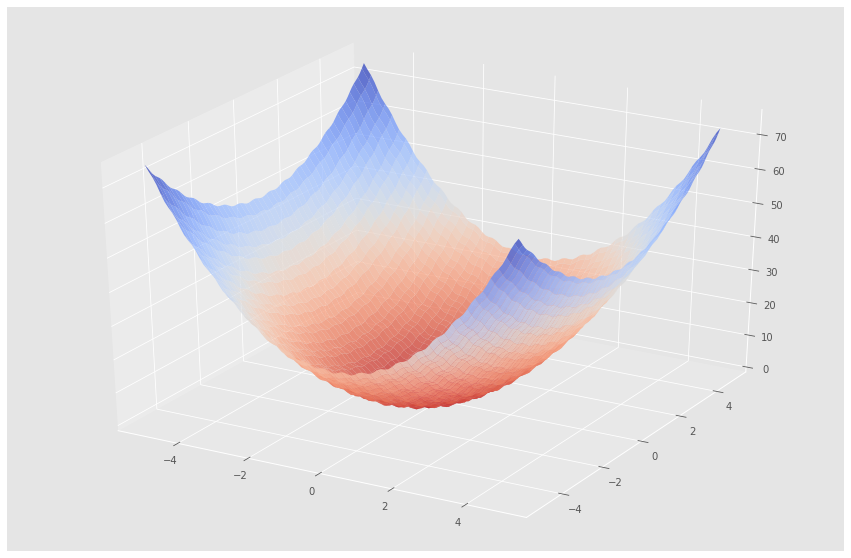

In [ ]:
plot_problem()

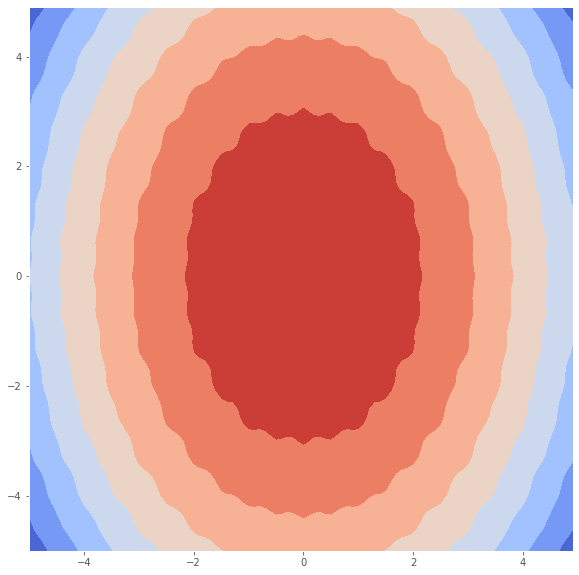

In [ ]:
plot_problem('2')

In [ ]:
def init_es(individual_cls, strategy_cls, size, min_val, max_val, min_strat, max_strat):
    """
    ES Individuals need a custom initialization
    """
    individual = individual_cls(random.uniform(min_val, max_val) for _ in range(size))
    individual.strategy = strategy_cls(random.uniform(min_strat, max_strat) for _ in range(size))
    return individual 

dims = 10
min_val, max_val = -5., 5.
min_strat, max_strat = 1e-6, 1.
cma_es = cma.Strategy(centroid=[5.0]*dims, sigma=5.0, lambda_=5*dims)

# minimization problem, thus fitness min
creator.create('FitnessMin', base.Fitness, weights=(-1,0,))
creator.create('Individual', list, fitness=creator.FitnessMin, strategy=None)
creator.create('Strategy', list)

# creating the EA operations
toolbox = base.Toolbox()
toolbox.register('individual', init_es,
                 creator.Individual,
                 creator.Strategy,
                 dims,
                 min_val,
                 max_val,
                 min_strat,
                 max_strat)
toolbox.register('population', tools.initRepeat, list,
                 toolbox.individual)
toolbox.register('mutate', tools.mutESLogNormal, c=1, indpb=0.1)
toolbox.register('mate', tools.cxESBlend, alpha=0.1)
toolbox.register('evaluate', benchmarks.bohachevsky)
toolbox.register('select', tools.selBest)
toolbox.register('generate', cma_es.generate, creator.Individual)
toolbox.register('update', cma_es.update)

# defining statistics and keeping the best performing individual in the Hall of Fame
hof = tools.HallOfFame(1)
stats = tools.Statistics(lambda ind: ind.fitness.values)  # we need to define our own fitness evaluation
stats.register('avg', np.mean)
stats.register('std', np.std)
stats.register('min', np.min)
stats.register('max', np.max)

population, logbook = algorithms.eaGenerateUpdate(toolbox,
                                                  ngen=60, stats=stats,
                                                  halloffame=hof)

/usr/local/lib/python3.6/dist-packages/deap/creator.py:141: RuntimeWarning: A class named 'FitnessMin' has already been created and it will be overwritten. Consider deleting previous creation of that class or rename it.
  RuntimeWarning)
/usr/local/lib/python3.6/dist-packages/deap/creator.py:141: RuntimeWarning: A class named 'Individual' has already been created and it will be overwritten. Consider deleting previous creation of that class or rename it.
  RuntimeWarning)
/usr/local/lib/python3.6/dist-packages/deap/creator.py:141: RuntimeWarning: A class named 'Strategy' has already been created and it will be overwritten. Consider deleting previous creation of that class or rename it.
  RuntimeWarning)


gen	nevals	avg    	std    	min    	max    
0  	50    	1390.23	467.393	695.658	2902.54
1  	50    	1159.34	457.685	423.222	2303.57
2  	50    	1214.08	613.769	427.953	3494.17
3  	50    	1173.36	512.352	193.419	2642.35
4  	50    	1237.3 	537.924	324.086	2698.81
5  	50    	1092.64	536.574	244.404	2983.01
6  	50    	913.986	407.615	295.925	1848.58
7  	50    	599.617	279.616	111.842	1274.73
8  	50    	366.433	188.124	58.5715	914.167
9  	50    	305.952	118.48 	49.6844	577.602
10 	50    	203.512	86.9003	88.2409	421.412
11 	50    	138.666	64.8271	36.73  	416.698
12 	50    	119.046	41.8633	56.155 	232.386
13 	50    	86.0873	39.3639	19.3854	201.729
14 	50    	69.0337	30.4158	19.6857	173.678
15 	50    	67.1864	29.9553	17.7904	159.971
16 	50    	51.1201	19.4265	16.5064	107.014
17 	50    	39.611 	16.8591	10.9673	88.885 
18 	50    	32.667 	11.6376	10.7946	61.3716
19 	50    	24.397 	8.52943	11.3713	47.9769
20 	50    	20.2773	7.32518	6.21746	38.7598
21 	50    	16.4692	5.52947	8.02928	39.2555
22 	50    	

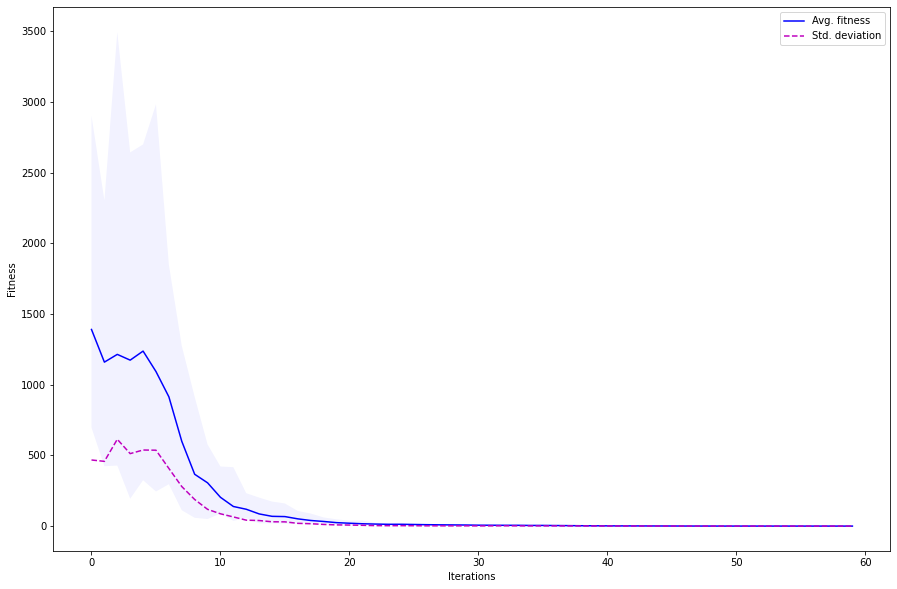

In [ ]:
plt.figure(1, figsize=(15, 10))
plt.plot(logbook.select('avg'), 'b-', label='Avg. fitness')
plt.fill_between(range(len(logbook)), logbook.select('max'), logbook.select('min'), facecolor='blue', alpha=0.05)
plt.plot(logbook.select('std'), 'm--', label='Std. deviation')
plt.legend(frameon=True)
plt.ylabel('Fitness'); plt.xlabel('Iterations');

***

## Use in NLP



### Evolutionary Grammar-Based Fuzzing
* Fuzzer provide randomly generated inputs to a software in order to expose erroneous behaviour.
* These generated inputs should match the input format.
* Grammars can be used for syntactically correct inputs.
* Evolutionary Programming is used to guide the fuzzer to generate inputs which are likely to trigger exceptional behaviour.




![[OBG] Grammar Fuzz.PNG](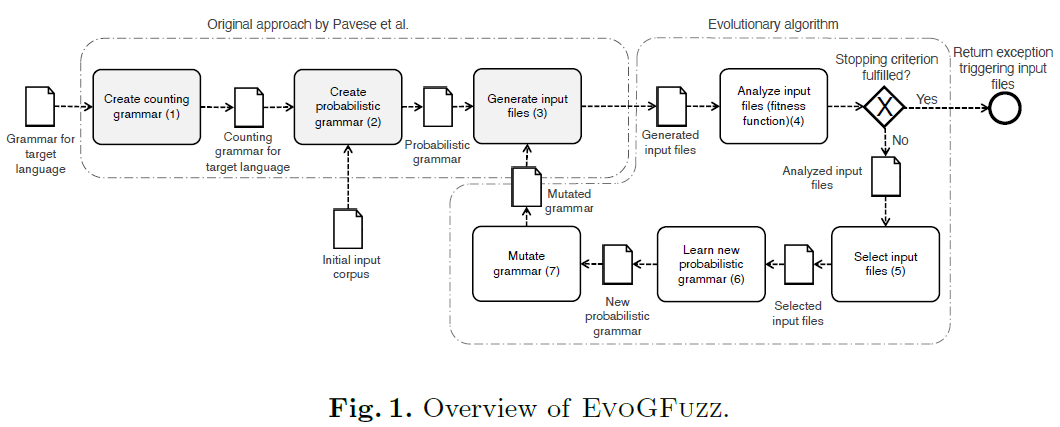)

## Approaches in Text Summarization
### Genetic Algorithm Based Sentence Extraction For Text Summarization (2002)

* In extractive summarization, one identifies informative sentences which are suited to summarize a document.
* This sentence extraction requires features.
* In order to identify valuable features, a genetic algorithm is used to weight features.


### Summarising text with a genetic algorithm-based sentence extraction (2008)

* Sentences for a summary are selected through a genetic algorithm.
* Genetic Algorithm  used as search technique, in order to find a summary which has a high readability, high cohesion and topic relation.


![[OBG]Genetic Alg on Text SUmm.PNG](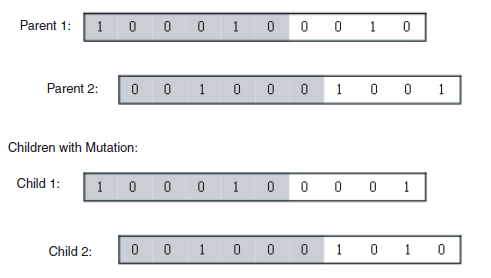)

* The fitness function combines redability, cohesion and topic relation 

$$F = \frac{\alpha \times TRF + \beta \times CF + \gamma \times RF}{\alpha + \beta + \gamma}$$

***

# Stochastic Zeroth-Order Optimization

## Basics

* Stochastic Zeroth-Order (SZO) methods are used in black box optimization, e.g adversarial black box attacks.
* SZO methods only have oracle predictions over an input $x$ while minimizing a function $f(x)$
* Used when gradients are difficult to compute.
* Black Box attacks aim to make a model more robust, e.g autonomous driving
* Black Box scenarios have limited knowledge of the model (no labeled data, learned weights, parameters).
* Problem: Convergence speed depends on the dimensionality of the function, at least in a linear dependence.
* Recent work aim at to remedy this limitation, especially when the input dimension $n$ is large, but $f(x)$ allows a low dimensional structure (e.g the function depends only on $k$ coordinates or use a k-dimensional subspace).

![[OBG] fgsm_panda_image.png](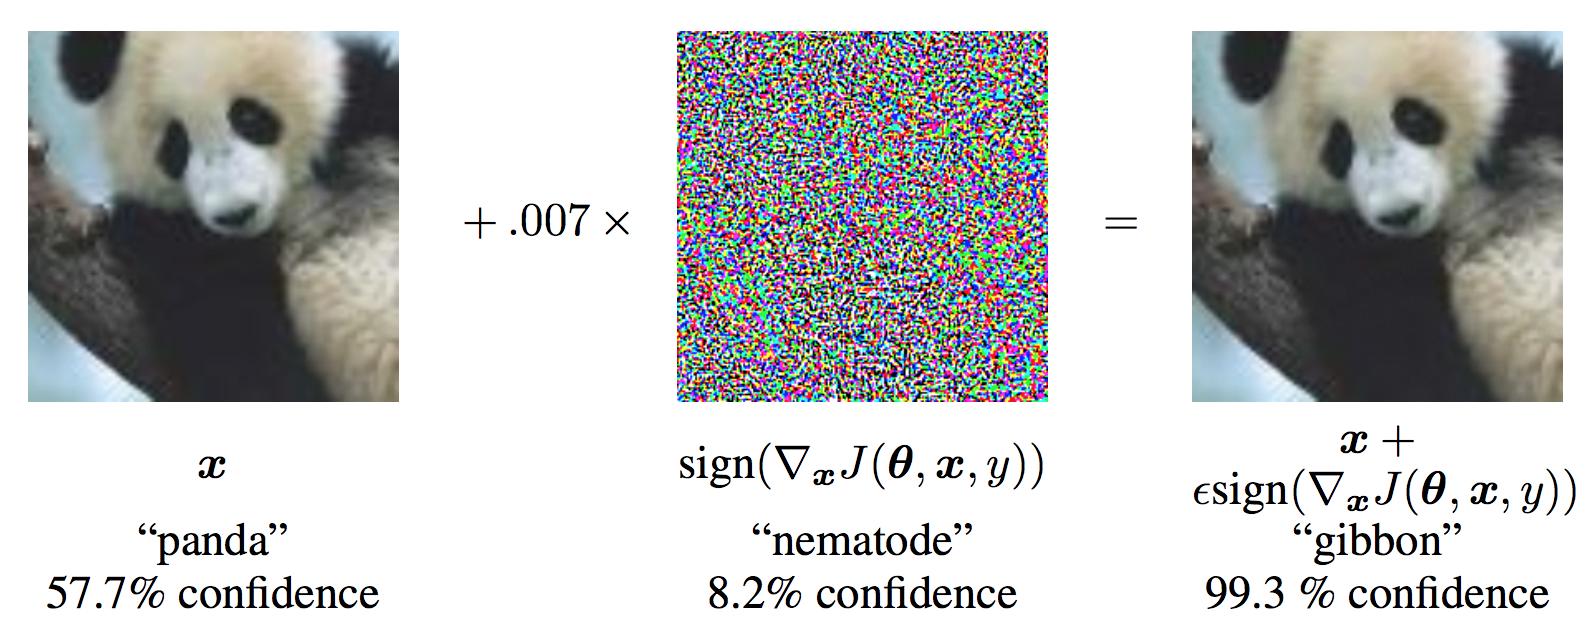)

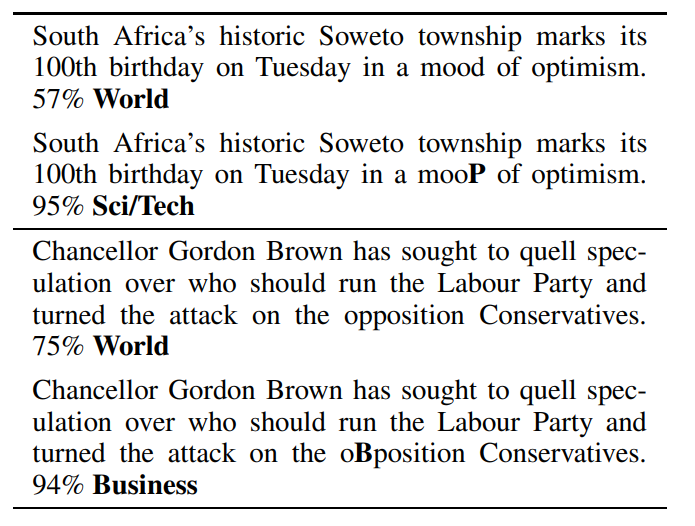

## Sparse Peturbations in SZO Optimization for Nonconvex Objectives
$\DeclareMathOperator{\E}{\mathbb{E}}$
$\DeclareMathOperator{\R}{\mathbb{R}}$

* Paper introduces a sparse SZO optimization method which aims to reduce a common weakness: the dependency on the dimensionality of the function. This factor is reduced to the expected dimensionality of the random peturbation during learning.
* Paper performs dimensionality reduction on the random peturbation vector by iteratively selecting parameter with high magnitude for further stoachastic zeroth order tuning. Other parameters are freezed at their current values.

## Sparse Peturbations
* Consider a stochastic optimization problem: $min_w f(w)$ where $f(w) := \E_x[F(w,x)]$
* $\E_x$: Expectation over inputs $x \in X$
* $w \in \R^n $ parameterizes objective function F 

\\

* Paper focuses on non-convex functions $F$, Lipschitz-smoothness is assumed.
* When a function is lipschitz-smooth, it is limited in how fast it can change.
* $F(w,x) \in C^{1,1}$ is Lipschitz-smooth iff
$$\forall_{w, w', x}: ||\bigtriangledown F(w,x) - \bigtriangledown F(w', x)|| \leqslant L(F)||w - w'|| \tag{1} $$

\\
* $C^{p,k}$ denotes the class of p times differentiable functions whose k-th derivative is Lipschitz continuous.
* $L(F)$ denotes the Lipschitz constant of F

\\
* Random peturbation is based on sampling a $n-$dimensional Gaussian random vector $u$ from a zero-mean isotropic multivariate Gaussian with a $n \times n $ covariance matrix $\Sigma = I$
* The probability density function is defined as:
$$
u \sim \mathcal{N}(0, \Sigma) \\
pdf(u) := \frac{1}{\sqrt{(2\pi)^n \cdot det \Sigma}} e^{-\frac{1}{2}u^\top \Sigma^{-1} u}
$$


* Through the expectation over peturbations $\mathbb{E}_u[f(w + \mu u)]$ with $\mu > 0$ as a smoothing parameter, we obtain a Gaussian approximation of a function f.

* **Contribution:** A sparsification of the random peturbation vector $u$ supports iteration complexity
* Mask m at iteration t: $m^{(t)} \in {0,1}^n$
* Sparsification: $\bar{v}^{(t)} = m^{(t)} \odot v^{(t)}$
* $\odot$ componentwise multiplication operator
* Number of nonzero parameters of $\bar{v}^{(t)}$ for a mask is $\bar{n}^{(t)} := ||m^{(t)}||$
* A sparsified Gaussian random vector drawn from $\mathcal{N}(0, I)$ is now $\bar{u}:= m \odot u$
* Now we redefine the expectation over peturbations to
$$
f_{\mu}(w) := \mathbb{E}_{\bar{u}}[f(w+\mu\bar{u}]
$$
* $f_\mu$ is Lipschitz smooth $L(f_\mu) < L(f)$
* Additionally, by applying standard differentation rules to this Gaussian approximation of a non-differentiable original function  $f_{\mu}(w) := \mathbb{E}_{\bar{u}}[f(w+\mu\bar{u}]$ one yield a Lipschitz-continous gradient $g_\mu(w):= \mathbb{E}_u[\frac{f(w+\mu u) - f(w)}{\mu}\bar{u}]$ 
* This gradient is then used as update rule.











![[OBG] Algo SZO.PNG](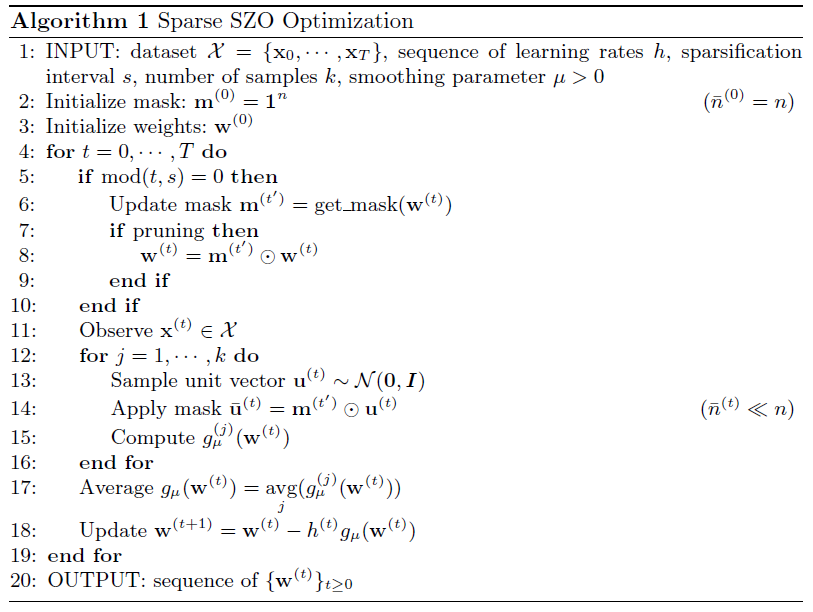)

* Algorithm 1 allows pruning and freezing.
* We start with full peturbations (line 2).
* Line 6 applies masking (magnitude or random masking) .
* Line 8 applies pruning.

## Masking Strategies

* Magnitude Masking: Indices sorted after their L1-norm magnitude. Values below a threshold are masked.
* Random Masking: Sample 50 random mask patterns and select the best performing according to accuracy.

## Pruning and freezing

* In **Pruning**, the same sparsification mask that is applied to the Gaussian peturbations is also used on the weight vector.
* In **Freezing**, the sparsification mask is only apply to the Gaussian peturbations. All weight values from the previous iteration are inherited.

## Comparision to Evolutionary Programming

* Evolutionary Algorithms and Stochastic Zeroth Order Optimization have the same goal: Minimize an objective.
* Both have a metaheuristic nature and are 'derivative free'.
* Stochastic Zeroth Order minimizes an objective $f(x)$ only given Oracle access to predictions give an input $x$.
* However, Evolutionary Algorithms have a fitness function to optimize. 
* The magnitude masking combined with freezing is similar to evolution strategies.
* Combinations of Stochastic Zeroth Order and Evolution Strategies are already considered.




# AutoML –  Neural Architecture Search (NAS)




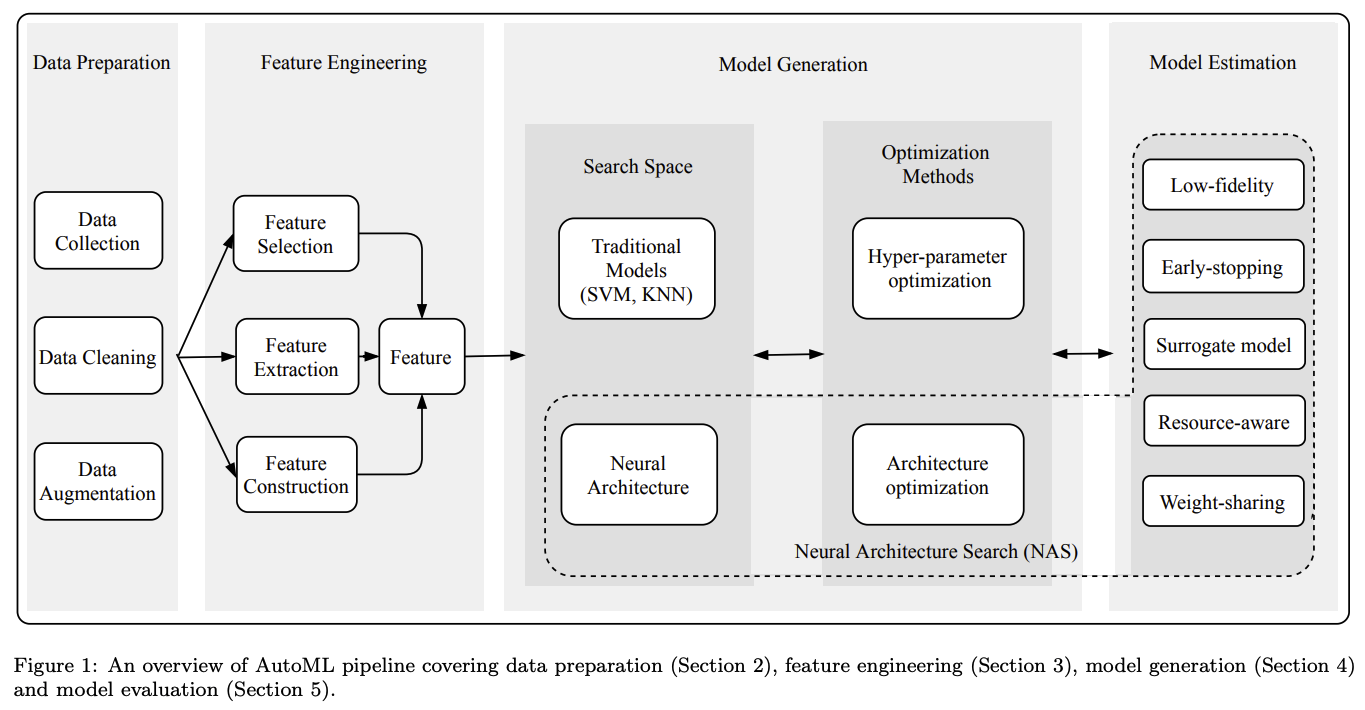

## Data Preparation



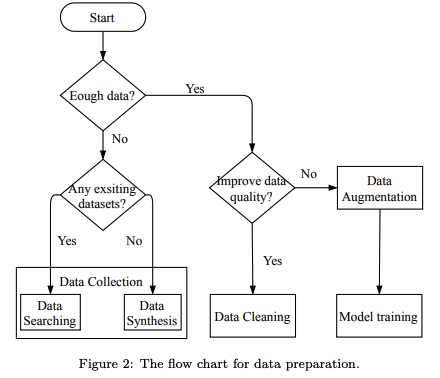

## Feature Engineering


### Feature Selection

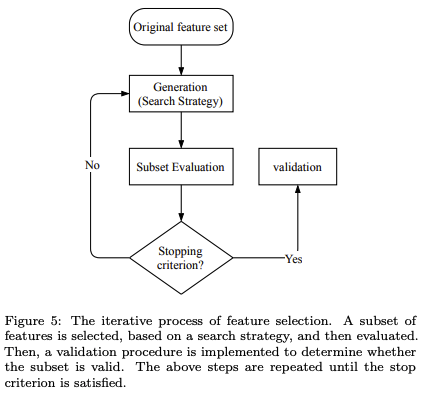

Commonly used algorithms for `Feature Selection` are: 
- `Genetic Algorithms`
- `Beam-Search`

For `GA` the criterion is the classifcation accuracy to measure the quality of the features.

### Feature Construction

- creating new features from raw data to help model generalize better
- increase representation of data (think of more liberalized models, no harsh biases in language models, which learn from i.e. racist's speech)
- Algorithm learns to automate the process of searching and evaluation of the operations done in constructing new features as normalization, standardization, etc.

### Feature Extraction
- done via mapping functions, s.t. it extracts information and non-redundant features given certain metrics
- alters the original features
- common algorithms used here are: `PCA` and `LDA`
- newcomers (as always make everything neural): `representation learning` and/or `AE` networks

# Neural Architecture Search (NAS)

`NAS` consists of three crucial components:
- Search Space of Neural Architectures
- Architecture Optimization (Search Strategy for EA and Search Policy for RL)
- Model Estimation

- First RNN was trained and produced human-comparable results which followed up with massive research in `NAS`

## Model generation

Model generation can be divided into three subcategories:
- Search Space:
    - Traditional methods
    - Neural methods (contemplates the design criteria for neural architectures)
- Optimization:
    - Hyperparameter optimization
    (such as learning rate and batch size)
    - Architecture optimization (guiding the search to find an efficient way to a high quality model)
- Model Estimation (model's performance needs to be evaluated):
    - training till convergence with follow up eval on validation set
    - loss estimation

## Search Space

NNs can be represented as a direct acyclic graph, while:
- ordered nodes $Z$
- nodes $z$ represent a tensor
- edges $o$ represents an operation from a set of operations $O$

$$
z^{(k)} = \sum_{i=1}^{N} o^{(i)}(z^{(i)}),\quad o^{(i)} \in O
$$

- $O$ includes operations such as convolutions, pooling, activations, skip connection, concatenation and addition. You name what you want to see. Thus you can add more operations to your liking, however keep in mind: *This is resource intensive.*

- Set an in-degree threshold for the nodes $z$, to keep computational resources in mind

- $O$ is literally the structure you can give the algorithm to optimize towards to 
- **prevent human bias overfitting + add variance for the search space to be flexible enough to be able to find new architectures**

Some commonly proposed Search Spaces include:
- Entire-structured Search Space


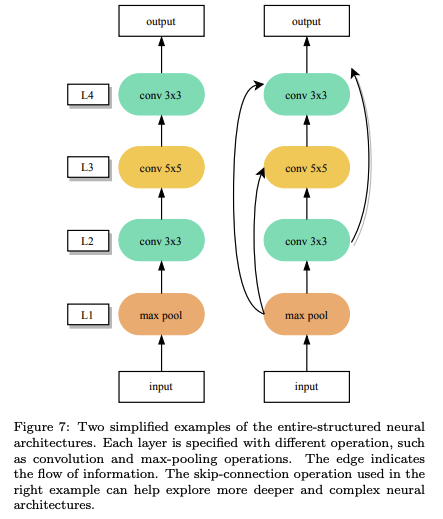

- Cell-Based Search Space

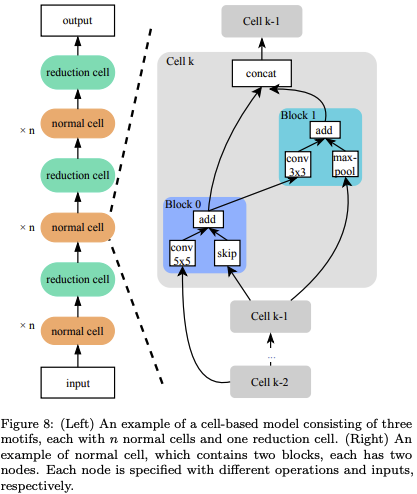

- Hierarchical Search Space

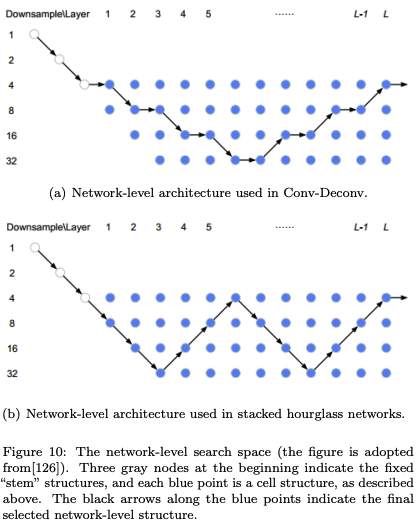

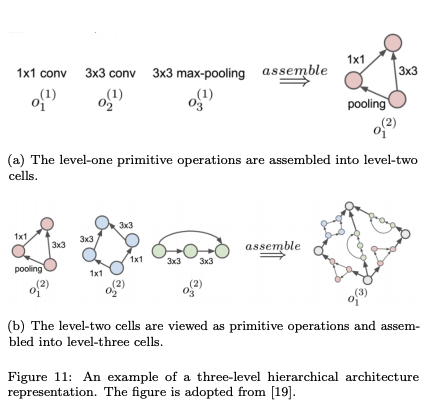

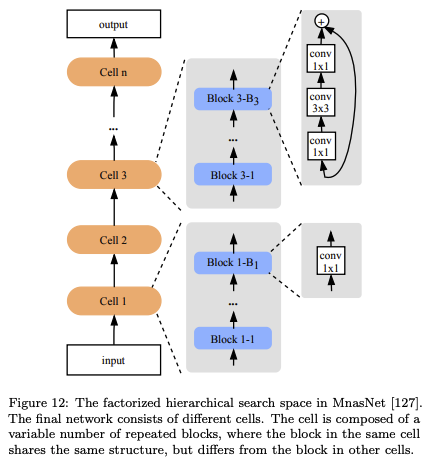

- Morphism-Based Search Space

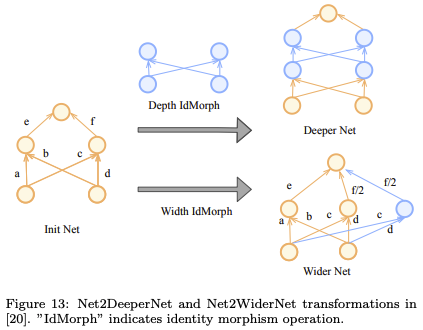

## Architecture Optimization (AO)

- The architecture of a NN is a set of static hyperparameters which need tuning
- performance is measured on the validation set

### `AO` via Evolutionary Algorithms

Encoding NN architectures in `EA`s:
- **direct encoding**
    - explicitly specify the phenotype
    - commonly used:
        - binary encoding
        - NeuroEvolution of Augmenting Topologies (NEAT), stores every node and connection

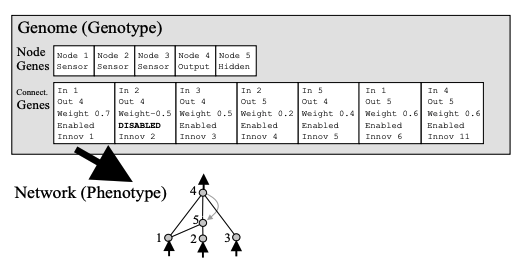

- **indirect encoding**
    - specify a generation rule to build the network
    - commonly used:
        - cellular encoding encodes a family of neural networks into a set of labeled trees. Offsprings usually perform at least as good as the parents.


Evolutionary Algorithms work here in their common four-step pattern:

- **Selection**:
    - selecting networks from the generated networks for `crossover`
    - select best performing and eliminate worst ones
    - selection commonly via:
        - fitness selection: probility based on its fitness
        - rank selection: selection proportional to network's relative fitness
        - tournament selection: sample from population and sort based on network's performance. Continue selecting the best network with a probability of p, second-best with p * (1-p) [...]

- **Crossover**:
    - two networks generate a new offspring network inheriting half/half genetic information of the parents
    - binary representation: one-point or multiple-point crossover
    - cellular encoding: random selected sub-tree is cut and replaced with another one
    - NEAT synapsis, such that new structure contains both of the parents

- **Mutation**:
    - mutation occurs randomly on a new offspring
    - commonly used mutation operations:
        - bit flipping (enables disables connection between layers/add or remove skip connections)
    - mutation can damage the structure, but also enables exploration, structures and diversity

- **Update**:
    - commonly used:
        - worst performing network of two randomly selected is discarded from the population
        - oldest networks are removed
        - discard all
        - let population grow
        - remove via probability

## Model Estimation

### Low Fidelity
- decrease training set
- reduce model size
- train model on above settings to estimate performance

### Weight Sharing
- accelerate the process of `NAS`
- transfer learning for `NAS`
- share parameters and weights

### Surrogate
- after attaining a proper approximation, configurations to optimize the search are rather easy to derive

### Early Stopping
- if models are predicted to perform poorly on validation set, they are stopped and discarded

### Resource-aware
- early studies focused more on higher performance
- follow-up studies researched resource-aware algorithms
- algorithms add computational cost to the loss function as a constraint
- example constraints:
    - parameter size
    - #multiply-accumulate operations
    - #float-point operations
    - inference latency



# AutoML with TPOT

In [ ]:
from tpot import TPOTClassifier
from sklearn.datasets import load_digits
from sklearn.model_selection import train_test_split

digits = load_digits()
X_train, X_test, y_train, y_test = train_test_split(digits.data, digits.target,
                                                    train_size=0.7, test_size=0.3)

pipeline_optimizer = TPOTClassifier(generations=5, population_size=20, cv=5,
                                   random_state=42, verbosity=3, n_jobs=-1)
pipeline_optimizer.fit(X_train, y_train)
print(pipeline_optimizer.score(X_test, y_test))
pipeline_optimizer.export('./export.py')


32 operators have been imported by TPOT.


_pre_test decorator: _random_mutation_operator: num_test=0 Negative values in data passed to MultinomialNB (input X).
_pre_test decorator: _random_mutation_operator: num_test=1 Negative values in data passed to MultinomialNB (input X).
_pre_test decorator: _random_mutation_operator: num_test=2 Negative values in data passed to MultinomialNB (input X).
_pre_test decorator: _random_mutation_operator: num_test=0 Solver lbfgs supports only dual=False, got dual=True.
_pre_test decorator: _random_mutation_operator: num_test=0 Found array with 0 feature(s) (shape=(50, 0)) while a minimum of 1 is required..
Pipeline encountered that has previously been evaluated during the optimization process. Using the score from the previous evaluation.
Pipeline encountered that has previously been evaluated during the optimization process. Using the score from the previous evaluation.

Generation 1 - Current Pareto front scores:

-1	0.972152659204452	KNeighborsClassifier(input_matrix, KNeighborsClassifier_

In [ ]:
!cat export.py

import numpy as np
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.neighbors import KNeighborsClassifier

# NOTE: Make sure that the outcome column is labeled 'target' in the data file
tpot_data = pd.read_csv('PATH/TO/DATA/FILE', sep='COLUMN_SEPARATOR', dtype=np.float64)
features = tpot_data.drop('target', axis=1)
training_features, testing_features, training_target, testing_target = \
            train_test_split(features, tpot_data['target'], random_state=42)

# Average CV score on the training set was: 0.9824922532093847
exported_pipeline = KNeighborsClassifier(n_neighbors=3, p=2, weights="distance")
# Fix random state in exported estimator
if hasattr(exported_pipeline, 'random_state'):
    setattr(exported_pipeline, 'random_state', 42)

exported_pipeline.fit(training_features, training_target)
results = exported_pipeline.predict(testing_features)


In [ ]:
from sklearn.datasets import load_breast_cancer

cancer = load_breast_cancer()
X_train, X_test, y_train, y_test = train_test_split(cancer.data, cancer.target,
                                                    train_size=0.7, test_size=0.3)

pipeline_optimizer = TPOTClassifier(generations=5, population_size=20, cv=5,
                                   random_state=42, verbosity=3, n_jobs=-1)
pipeline_optimizer.fit(X_train, y_train)
print(pipeline_optimizer.score(X_test, y_test))
pipeline_optimizer.export('./export_cancer.py')


32 operators have been imported by TPOT.



Generation 1 - Current Pareto front scores:

-1	0.9522784810126582	RandomForestClassifier(input_matrix, RandomForestClassifier__bootstrap=True, RandomForestClassifier__criterion=gini, RandomForestClassifier__max_features=0.2, RandomForestClassifier__min_samples_leaf=8, RandomForestClassifier__min_samples_split=4, RandomForestClassifier__n_estimators=100)

-2	0.9523101265822784	GaussianNB(LinearSVC(input_matrix, LinearSVC__C=15.0, LinearSVC__dual=True, LinearSVC__loss=squared_hinge, LinearSVC__penalty=l2, LinearSVC__tol=0.001))

-3	0.9598101265822784	RandomForestClassifier(MinMaxScaler(LinearSVC(input_matrix, LinearSVC__C=0.5, LinearSVC__dual=True, LinearSVC__loss=hinge, LinearSVC__penalty=l2, LinearSVC__tol=1e-05)), RandomForestClassifier__bootstrap=True, RandomForestClassifier__criterion=gini, RandomForestClassifier__max_features=0.2, RandomForestClassifier__min_samples_leaf=8, RandomForestClassifier__min_samples_split=4, RandomForestClassifier__n_estimators=100)
_pre_test decorator:

In [ ]:
!cat export_cancer.py

import numpy as np
import pandas as pd
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import train_test_split
from sklearn.pipeline import make_pipeline, make_union
from sklearn.preprocessing import MinMaxScaler
from sklearn.svm import LinearSVC
from tpot.builtins import StackingEstimator
from tpot.export_utils import set_param_recursive

# NOTE: Make sure that the outcome column is labeled 'target' in the data file
tpot_data = pd.read_csv('PATH/TO/DATA/FILE', sep='COLUMN_SEPARATOR', dtype=np.float64)
features = tpot_data.drop('target', axis=1)
training_features, testing_features, training_target, testing_target = \
            train_test_split(features, tpot_data['target'], random_state=42)

# Average CV score on the training set was: 0.9774050632911392
exported_pipeline = make_pipeline(
    StackingEstimator(estimator=LinearSVC(C=0.5, dual=True, loss="hinge", penalty="l2", tol=1e-05)),
    MinMaxScaler(),
    StackingEstimator(estimator=LinearSVC(C=1

# Other Applications

* Video game engines, e.g NeuralMotion's Euphoria which simulates character movements
* Robotics, especially for automatic creation of autonomous robots
* Scheduling applications

# Conclusion

* Modern hardware allows us to use evolutionary techniques
* Despite being an old topic in computer science, it suffers from reinvention and rediscovery
* General low funding of Evolutionary Algorithms (e.g mathematical explanations which are often non-analytic and ad-hoc)


# Bibliography

* Hansen, Nikolaus. "The CMA evolution strategy: A tutorial." arXiv preprint arXiv:1604.00772 (2016).
* Davidson-Pilon, Cameron. Bayesian methods for hackers: probabilistic programming and Bayesian inference. Addison-Wesley Professional, 2015.
* Weng, Lilian. "Evolution Strategies", https://lilianweng.github.io/lil-log/2019/09/05/evolution-strategies.html, Accessed 25.01.21
* Nolfi, Stefano and Dario, Floreano, Evolutionary Robotics, http://laral.istc.cnr.it/nolfi/er-book.html, Accessed 28.01.21
* Dr. Lange, Sascha. "Evolutionary Algorithms", http://ml.informatik.uni-freiburg.de/former/_media/documents/teaching/ss11/ml/04_evolution.pdf, Accessed: 2021-01-23
* Prof. Dr. Schneider, Gisbert. https://masterchemoinfo.u-strasbg.fr/Documents/Conferences/Lecture3_EvolutionaryAlgorithmsx.pdf, Accessed: 2021-01-23
* Simon, Dan. Evolutionary optimization algorithms. John Wiley & Sons, 2013.
* Carr, Jenna. "An introduction to genetic algorithms." Senior Project 1.40 (2014): 7.
* Ohta, Mayumi, et al. "Sparse Perturbations for Improved Convergence in Stochastic Zeroth-Order Optimization." International Conference on Machine Learning, Optimization, and Data Science. Springer, Cham, 2020.
* Wang, Jun-Kun, Xiaoyun Li, and Ping Li. "Zeroth Order Optimization by a Mixture of Evolution Strategies." (2019).
* Qazvinian, Vahed, Leila Sharif Hassanabadi, and Ramin Halavati. "Summarising text with a genetic algorithm-based sentence extraction." International Journal of Knowledge Management Studies 2.4 (2008): 426-444.
* Eberlein, Martin, et al. "Evolutionary Grammar-Based Fuzzing." International Symposium on Search Based Software Engineering. Springer, Cham, 2020.
* Suanmali, Ladda, Naomie Salim, and Mohammed Salem Binwahlan. "Genetic algorithm based sentence extraction for text summarization." International Journal of Innovative Computing 1.1 (2011).
* Ebrahimi, Javid, et al. "Hotflip: White-box adversarial examples for text classification." arXiv preprint arXiv:1712.06751 (2017).
* Papernot, Nicolas, et al. "Practical black-box attacks against machine learning." Proceedings of the 2017 ACM on Asia conference on computer and communications security. 2017.
* Goodfellow, Ian J., Jonathon Shlens, and Christian Szegedy. "Explaining and harnessing adversarial examples." arXiv preprint arXiv:1412.6572 (2014).
* Xin He, Kaiyong Zhao, Xiaowen Chu, "AutoML: A Survey of the State-of-the-Art"
* TPOT Code Sample: https://epistasislab.github.io/tpot/examples/#digits-dataset 

***
Benjamin Beilharz, Philipp Meier  
ICL, Heidelberg University  
Oldies but Goldies – WT 2020/2021